# オリジナル

In [2]:
import csv
import json
import numpy as np
import matplotlib.pyplot as plt
# 訓練用データ(train)テスト用データ(test)を分ける　train_test_split
# k分割交差検証を行うKFoldをインストール
from sklearn.model_selection import train_test_split, KFold
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics, callbacks


In [3]:
# データの読み込み

# データセットのパス
file_path = "dataset/csgo_graf2.csv"
# データを入れる配列変数
datas = list()
# ファイルの読み込み
with open(file_path, "r") as f:
    
    r = csv.reader(f)  # rに読み込んだcsvを入れている

    # 読み込んだデータセットをitemsに読み込んでいる
    # next関数では１行目の要素名の読み込みをしない様にできる
    # イテレータ(iter)は要素を一つずつ取り出せる

    items = next(iter(r)) #itemsの0行目に要素名を入れている
    items[0] = items[0][1:] 

    # rはデータ数　Rはデータ数分を繰り返す
    for i, R in enumerate(r):
        if i == 0: 
            tmp = float(R[8])
            
        # datasに各要素の内容である数値を入れている
        datas.append({
            I:V for I, V in zip(items, map(float, R))
        })
        datas[-1]["avg"] = tmp
        tmp = float(R[8])
        

datas, len(datas)

([{'year': 2022.0,
   'month': 12.0,
   'date': 202212.0,
   'good': 63834.0,
   'bad': 7258.0,
   'all_review_count': 71092.0,
   'recommend_count': 3.0,
   'review_count': 4.0,
   'avg': 629325.0,
   'gain': 8319.0,
   'peak': 1065079.0,
   'price': 0.0,
   'steam_online': 909421602.0},
  {'year': 2022.0,
   'month': 11.0,
   'date': 202211.0,
   'good': 55857.0,
   'bad': 6644.0,
   'all_review_count': 62501.0,
   'recommend_count': 5.0,
   'review_count': 6.0,
   'avg': 629325.0,
   'gain': 12656.5,
   'peak': 1129095.0,
   'price': 0.0,
   'steam_online': 852068535.0},
  {'year': 2022.0,
   'month': 10.0,
   'date': 202210.0,
   'good': 55731.0,
   'bad': 6675.0,
   'all_review_count': 62406.0,
   'recommend_count': 6.0,
   'review_count': 6.0,
   'avg': 621006.0,
   'gain': -10426.5,
   'peak': 1078860.0,
   'price': 0.0,
   'steam_online': 849997689.0},
  {'year': 2022.0,
   'month': 9.0,
   'date': 202209.0,
   'good': 57430.0,
   'bad': 7128.0,
   'all_review_count': 64558.0,


In [4]:
# データの標準化

# データの平均
mean_items = {
    I: np.average([D[I] for D in datas])  for I in items
}
# データの標準偏差
std_items = {
    I: np.std([D[I] for D in datas])  for I in items
}
# データの標準化
standardization_datas = [
    {I:(D[I] - mean_items[I]) / std_items[I] for I in items} for D in datas
]

mean_items, std_items, standardization_datas

({'year': 2018.0,
  'month': 6.5,
  'date': 201806.5,
  'good': 57096.5,
  'bad': 7632.666666666667,
  'all_review_count': 64729.166666666664,
  'recommend_count': 3.9074074074074074,
  'review_count': 4.407407407407407,
  'avg': 420088.89333333337,
  'gain': 5393.859999999999,
  'peak': 718551.574074074,
  'price': 560.5277777777778,
  'steam_online': 486088550.7777778},
 {'year': 2.581988897471611,
  'month': 3.452052529534663,
  'date': 258.2219652417922,
  'good': 33103.508946406495,
  'bad': 4928.6007367428565,
  'all_review_count': 37047.51621841475,
  'recommend_count': 2.2175104368915397,
  'review_count': 2.5785333077554746,
  'avg': 173393.9272622001,
  'gain': 37190.001701805006,
  'peak': 266216.4202767144,
  'price': 653.5168174652252,
  'steam_online': 201532861.34142375},
 [{'year': 1.5491933384829668,
   'month': 1.5932550136313832,
   'date': 1.5703544027337124,
   'good': 0.20352827281566416,
   'bad': -0.0760188716187774,
   'all_review_count': 0.1717479060086258,
  

In [5]:
# データ作成
max_year, min_year = int(max([D["year"] for D in datas])), int(min([D["year"] for D in datas]))

# 目的変数と説明変数
x = list()
y = list()

# DはデータDSは標準化したデータ
for D, SD in zip(datas, standardization_datas):
    tmp = list()
    
    # Iには要素名
    for I in items:
        # yearの要素をone-hot表現にしている
        if I == "year":
            # 年の数だけ0を入力
            a = [0] * (max_year - min_year + 1)
            # 
            a[int(D["year"]) - min_year] = 1
            tmp += a
        # 月ごとのone-hot表現
        elif I == "month":
            a = [0] * 12  #分割する数をかけてあげる
            a[int(D["month"]) - 1] = 1 #分割の時の一番低い数を引いてあげる
            tmp += a
        # dateは省く様にしている
        elif I == "date":
            continue

        # 教師信号なのでyに入れる
        elif I == "avg":
            y.append(SD[I])

        else:
            tmp.append(SD[I])
        
    x.append(tmp)

# print(x)
x = np.array(x, np.float32)
y = np.array(y, np.float32)
print(len(x[0]))

# 学習データ/テストデータ分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# for xtr, xte, ytr, yte in zip(x_train, x_test, y_train, y_test):
#     print(f"xtr{xtr} xte{xte} ytr{ytr} yte{yte}")
print(x_test)


30
[[ 0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.18948142  0.17963178  0.19320683
  -0.86015713 -0.9336344   0.29920328  0.39495096  1.4069602  -0.82511944]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.42737162  0.2236605   0.41162902
   0.0417552  -0.15799966  0.7224587   1.0390472  -0.8577098   1.4282093 ]
 [ 0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.         -0.797423   -0.54572624 -0.78513134
  -0.86015713 -0.9336344  -0.80

Text(0.5, 0, 'month')

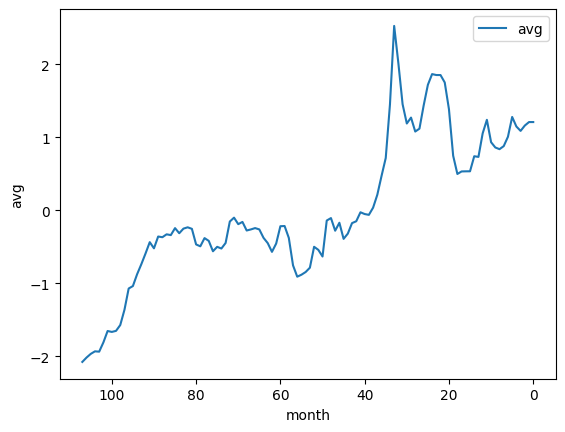

In [7]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(y, label = "avg")
# ax.plot(adam_history.history["val_loss"], label = "adam_test")
# ax.invert_yaxis()
ax.invert_xaxis()
# ax.set_yscale('log')
ax.legend()
# ax.set_ylim(0, 2.6)
# ax.set_xlim(0, 107)
ax.set_ylabel("avg")
ax.set_xlabel("month")

In [94]:
# モデル生成
# input_dimには入力の値を入れる

activation = "tanh"

"""
model = models.Sequential()
model.add(layers.Input(shape=x_train.shape[1:]))
model.add(layers.Dense(512, activation= activation))
# model.add(layers.LayerNormalization())
model.add(layers.Dense(256, input_dim=5, activation= activation))
model.add(layers.Dense(128, input_dim=5, activation= activation))
model.add(layers.Dense(64, input_dim=5, activation= activation))
# model.add(layers.Dense(32, input_dim=5, activation= activation))
model.add(layers.Dense(16, activation= activation))
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='linear'))
"""

# nnの構成をする関数
def build_model(x):
    # 活性化関数
    activation = "tanh"
    activation2 = "relu"

    # 入力層
    # inputするのは、12の要素
    input = layers.Input(shape = x.shape[1:])
    
    # 中間層
    # Denseは全結合で,(ニューロン数, 活性化関数)(入力やその後に出た計算xを再度入力)
    x = layers.Dense(units = 512, activation = activation)(input)
    x = layers.Dense(units = 256, activation = activation)(x)
    x = layers.Dense(units = 128, activation = activation)(x)
    x = layers.Dense(units = 64, activation = activation)(x)
    # x = layers.Dense(units = 32, activation = activation)(x)
    # x = layers.Dense(units = 16, activation = activation)(x)
    # x = layers.Dense(units = 8, activation = activation)(x)

    # 出力層
    output = layers.Dense(units = 1, activation = "linear")(x)

    return models.Model(input, output)

model = build_model(x)
model.summary()

model.compile(loss=losses.MeanSquaredError(), 
              optimizer=optimizers.Adam(learning_rate = 0.00001))

mc = callbacks.ModelCheckpoint(
    filepath = "model.h5",
    monitor = "val_loss",
    save_best_only = True,
    mode = "min"
)

history = model.fit(x_train, y_train, batch_size = len(x_train), epochs = 500, verbose = 1, 
                    validation_data=(x_test, y_test), callbacks =[mc])


print(model.evaluate(x_test, y_test))
model = models.load_model("model.h5")
print(model.evaluate(x_test, y_test))

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 30)]              0         
                                                                 
 dense_120 (Dense)           (None, 512)               15872     
                                                                 
 dense_121 (Dense)           (None, 256)               131328    
                                                                 
 dense_122 (Dense)           (None, 128)               32896     
                                                                 
 dense_123 (Dense)           (None, 64)                8256      
                                                                 
 dense_124 (Dense)           (None, 1)                 65        
                                                                 
Total params: 188,417
Trainable params: 188,417
Non-traina

In [112]:
# 学習モデルの動き testを分割しているので11コのavg予測が出ている　また12月のリストを見てあっているのかを誤差を出して確認している
predict = model.predict(x_test)
print(len(x_test))
for X, Y in zip(predict, y_test):
    print("y = ", X)

print("")
for X, Y in zip(predict, y_test):
    print("誤差")
    print(X - Y)


# print(predict-y_test)
# print("y_test=", y_test)

1/1 [==============================] - 0s 26ms/step
11
y =  [-0.04209604]
y =  [1.1640661]
y =  [-0.56910855]
y =  [1.1502197]
y =  [1.8623044]
y =  [-1.5359344]
y =  [-2.1237435]
y =  [0.8705397]
y =  [0.81052554]
y =  [-0.34443736]
y =  [-0.2016289]

誤差
[0.17039698]
誤差
[-0.08745635]
誤差
[-0.04398626]
誤差
[0.04834211]
誤差
[0.13737822]
誤差
[0.06697249]
誤差
[-0.07934904]
誤差
[0.01563948]
誤差
[0.25663352]
誤差
[-0.04837525]
誤差
[-0.07310945]


In [14]:
adam_history = history

In [7]:
sigmoid_history = history

In [9]:
relu_history = history

Text(0.5, 0, 'epochs')

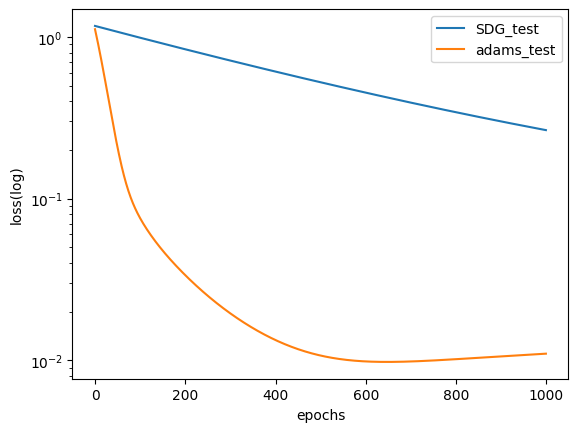

In [16]:
fig = plt.figure()
ax = fig.add_subplot()
# 学習曲線
# ax.plot(history.history["loss"], label = "train")
# 活性化関数tanhで学習した後のtanh_test
# ax.plot(history.history["val_loss"], label = "tanh_test")
# ax.plot(relu_history.history["val_loss"], label = "relu_test")
# ax.plot(sigmoid_history.history["val_loss"], label = "sigmoid_test")

ax.plot(history.history["val_loss"], label = "SGD_test")
ax.plot(adam_history.history["val_loss"], label = "adam_test")

ax.set_yscale('log')
ax.legend()
ax.set_ylabel("loss(log)")
ax.set_xlabel("epochs")

In [160]:
with open("history.json", "w") as f:
    json.dump(history.history, f)

with open("history.json", "r") as f:
    history = json.load(f)

In [162]:
history["loss"], history["val_loss"]

([0.8657496571540833,
  0.8494500517845154,
  0.8333494663238525,
  0.8174554109573364,
  0.8017687201499939,
  0.7862935066223145,
  0.7710320353507996,
  0.7559871673583984,
  0.7411612868309021,
  0.7265568971633911,
  0.712175726890564,
  0.6980196237564087,
  0.6840898990631104,
  0.6703881621360779,
  0.6569151282310486,
  0.6436717510223389,
  0.6306585073471069,
  0.6178755164146423,
  0.605323076248169,
  0.593001127243042,
  0.5809087753295898,
  0.5690460801124573,
  0.5574116706848145,
  0.5460047125816345,
  0.5348240733146667,
  0.5238682627677917,
  0.513135552406311,
  0.5026243329048157,
  0.49233278632164,
  0.4822584390640259,
  0.47239944338798523,
  0.46275320649147034,
  0.45331746339797974,
  0.4440895617008209,
  0.435066819190979,
  0.42624640464782715,
  0.4176255762577057,
  0.40920132398605347,
  0.40097057819366455,
  0.3929305672645569,
  0.38507798314094543,
  0.37740975618362427,
  0.36992284655570984,
  0.36261382699012756,
  0.35547956824302673,
  0.34

In [14]:
save_loss = list()
save_val_loss = list()
save_history = list()

#KFoldの設定
kf = KFold(n_splits = 10, shuffle = True, random_state = 1)

#交差検証
for train_index, test_index in kf.split(x, y):
    x_train = x[train_index]
    y_train = y[train_index]
    x_test = x[test_index]
    y_test = y[test_index]

    model = build_model(x)
    
    model.compile(loss=losses.MeanSquaredError(), 
              optimizer=optimizers.Adam(learning_rate = 0.00002))

    mc = callbacks.ModelCheckpoint(
        filepath = "model.h5",
        monitor = "val_loss",
        save_best_only = True,
        mode = "min"
    )

    history = model.fit(x_train, y_train, batch_size = len(x_train), epochs = 800, verbose = 1, 
                        validation_data=(x_test, y_test), callbacks =[mc])

    save_history.append(history.history)
    model = models.load_model("model.h5")
    
    best_val_loss = model.evaluate(x_test, y_test, verbose = False)

    best_loss = model.evaluate(x_train, y_train, verbose = False)

    save_val_loss.append(best_val_loss)
    save_loss.append(best_loss)

Epoch 1/800
1/1 [==============================] - 0s 490ms/step - loss: 0.9667 - val_loss: 0.7507
Epoch 2/800
1/1 [==============================] - 0s 41ms/step - loss: 0.9209 - val_loss: 0.7235
Epoch 3/800
1/1 [==============================] - 0s 44ms/step - loss: 0.8766 - val_loss: 0.6974
Epoch 4/800
1/1 [==============================] - 0s 47ms/step - loss: 0.8340 - val_loss: 0.6724
Epoch 5/800
1/1 [==============================] - 0s 50ms/step - loss: 0.7931 - val_loss: 0.6485
Epoch 6/800
1/1 [==============================] - 0s 49ms/step - loss: 0.7537 - val_loss: 0.6257
Epoch 7/800
1/1 [==============================] - 0s 48ms/step - loss: 0.7160 - val_loss: 0.6040
Epoch 8/800
1/1 [==============================] - 0s 50ms/step - loss: 0.6798 - val_loss: 0.5833
Epoch 9/800
1/1 [==============================] - 0s 58ms/step - loss: 0.6453 - val_loss: 0.5636
Epoch 10/800
1/1 [==============================] - 0s 50ms/step - loss: 0.6124 - val_loss: 0.5449
Epoch 11/800
1/1 [

Text(0.5, 0, 'epochs')

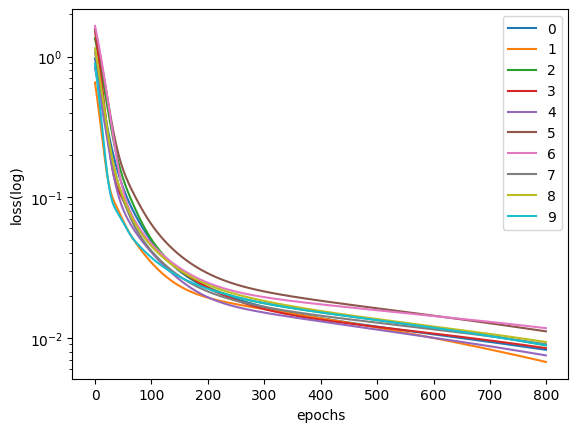

In [15]:
fig = plt.figure()
ax = fig.add_subplot()


# 学習曲線
# ax.plot(history.history["loss"], label = "train")
for i, H  in enumerate(save_history):
    H["loss"]
    # 活性化関数tanhで学習した後のtanh_test
    ax.plot(H["loss"], label = f"{i}")
    # ax.plot(H["val_loss"], label = "val_loss")

ax.set_yscale('log')
ax.legend()
ax.set_ylabel("loss(log)")
ax.set_xlabel("epochs")

In [16]:
max_save_loss = list()
min_save_loss = list()
max_save_val_loss = list()
min_save_val_loss = list()

max(save_loss), min(save_loss), max(save_val_loss), min(save_val_loss), np.average(save_loss), np.average(save_val_loss)


(0.07526558637619019,
 0.008886383846402168,
 0.13504959642887115,
 0.008454006165266037,
 0.022286498546600343,
 0.04093785434961319)

In [13]:
model.evaluate(x_test, y_test, verbose = False)

0.042035769671201706

In [19]:
model = models.Sequential()
# model.add(layers.Input(shape=x_train.shape[1:]))
model.add(layers.LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1:], 1)))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(units=50,return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(units=50,return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(units=50))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
lstm_history = model.fit(x_train, y_train, batch_size=32, epochs=100)

TypeError: Dimension value must be integer or None or have an __index__ method, got value '(30,)' with type '<class 'tuple'>'

In [75]:
# 標準偏差までの道のり

a = [164,162,167,169, 167,166,174,167]
# print(np.sum(a))   64
# len(a)    8

# 平均  8.0
# データ全体の合計 / データの個数
avg = (np.sum(a) / len(a)) 
print("avg:" , avg)


for i in range(len(a)):
    # カッコの中で (元データ - 平均)を行っている
    # 上記の計算をした各要素をnp.squareで2乗している
    k = a[i] - avg
    print(k)
    a[i] = np.square(k)

print("aaa", np.sum(a))
# 分散S  
# 上記のfor文で求めた(元データ - 平均)の２乗の合計 / データの個数
s = (np.sum(a) / len(a))
print("s:",s)

# 標準偏差 std

std = np.sqrt(s)
print("std", std)

avg: 167.0
-3.0
-5.0
0.0
2.0
0.0
-1.0
7.0
0.0
aaa 88.0
s: 11.0
std 3.3166247903554


In [176]:
# 素数判定
def isPrime(n):
    sosu = list()
    for i in range(2,n):  #2までが素数は確定なので2以上でrangeする
        if n % i == 0 :   #あまりが0の時に素数ではないのではじく
            ret = False
            break
    else:
        ret = True
        if ret == True:  #Trueであるならsosuのリストに格納する
            sosu.append(n)
    
    # t_sosu.append(sosu)
    return sosu

In [186]:
# 素数判定
sosu = list() #mainでも定義することで、2次元で素数を持ってくることができる
for i in range(20):
    sosu.append(isPrime(i))


# 空リストの削除
for i in range(len(sosu) - 1, -1, -1):
  if not sosu[i]:
    del sosu[i]
print(sosu)

[[0], [1], [2], [3], [5], [7], [11], [13], [17], [19]]
